## PRÀCTICA 2 

### Visualització de dades 
#### Xavier de Moner - fmoner@uoc.edu

In [75]:
# Llibreries necessàries
import pandas as pd
import numpy as np
import geopandas as gpd

In [76]:
#Variables
df = pd.read_csv("1.NYPD_Complaint_Data_Current__Year_To_Date_.csv")
print("\n=== 1.NYPD_Complaint_Data ===")
print(df.info())


=== 1.NYPD_Complaint_Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433281 entries, 0 to 433280
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                433281 non-null  object 
 1   ADDR_PCT_CD               433281 non-null  int64  
 2   BORO_NM                   433281 non-null  object 
 3   CMPLNT_FR_DT              433281 non-null  object 
 4   CMPLNT_FR_TM              433281 non-null  object 
 5   CMPLNT_TO_DT              410882 non-null  object 
 6   CMPLNT_TO_TM              433281 non-null  object 
 7   CRM_ATPT_CPTD_CD          433281 non-null  object 
 8   HADEVELOPT                433281 non-null  object 
 9   HOUSING_PSA               26751 non-null   float64
 10  JURISDICTION_CODE         433281 non-null  int64  
 11  JURIS_DESC                433281 non-null  object 
 12  KY_CD                     433281 non-null  int64  
 13  LAW_CAT_CD   

In [77]:
print("=== Resum del Dataset ===")
print(f"Número de files: {df.shape[0]}")
print(f"Número de columnes: {df.shape[1]}")
print("\nNom de les columnes:")
print(df.columns)

print("\nValors nuls per columna:")
print(df.isnull().sum())

print("\nTipus de dades de cada columna:")
print(df.dtypes)

print("\nPrimeres 5 fileres del dataset:")
print(df.head())

=== Resum del Dataset ===
Número de files: 433281
Número de columnes: 36

Nom de les columnes:
Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

Valors nuls per columna:
CMPLNT_NUM                       0
ADDR_PCT_CD                      0
BORO_NM                          0
CMPLNT_FR_DT                     0
CMPLNT_FR_TM                     0
CMPLNT_TO_DT                 22399
CMPLNT_TO_TM                     0
CRM_ATPT_CPTD_CD         

In [78]:
# NETEJA DE DADES

In [79]:
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], format='%d/%m/%Y', errors='coerce')
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'], format='%d/%m/%Y', errors='coerce')
df['RPT_DT'] = pd.to_datetime(df['RPT_DT'], format='%d/%m/%Y', errors='coerce')

In [80]:
# Anys dels delictes
# Convertim la columna de data al format datetime
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

# Extreiem l'any de cada denúncia
df['Year'] = df['CMPLNT_FR_DT'].dt.year

# Comptem el nombre de denúncies per any
denuncies_per_any = df['Year'].value_counts().sort_index()

# Mostrem el resultat
print(denuncies_per_any)

Year
1924.0         1
1966.0         1
1973.0         1
1979.0         1
1984.0         1
1985.0         1
1986.0         1
1988.0         1
1989.0         1
1990.0         3
1991.0         3
1992.0         1
1994.0         2
1995.0         3
1997.0         1
1998.0         6
1999.0         5
2000.0        11
2001.0         5
2002.0        10
2003.0         8
2004.0        14
2005.0         9
2006.0        10
2007.0        10
2008.0        13
2009.0         6
2010.0        11
2011.0        10
2012.0        17
2013.0        17
2014.0        43
2015.0        40
2016.0        44
2017.0        50
2018.0        56
2019.0        79
2020.0       115
2021.0       235
2022.0       421
2023.0      3194
2024.0    168310
Name: count, dtype: int64


In [81]:
# Filtrem només les denúncies de l'any 2024
df_2024 = df[df['Year'] == 2024].copy()

# Comprovem  mida del df filtrat
print(f"Nombre de denúncies l'any 2024: {df_2024.shape[0]}")

Nombre de denúncies l'any 2024: 168310


In [82]:
# Comptem valors nuls per columna
valors_nuls = df_2024.isnull().sum()
# Mostrem només columnes amb valors nuls
print(valors_nuls[valors_nuls > 0])

CMPLNT_TO_DT                 14196
HOUSING_PSA                 157889
PD_CD                           92
RPT_DT                       15146
TRANSIT_DISTRICT            160430
X_COORD_CD                       6
Y_COORD_CD                       6
Latitude                         6
Longitude                        6
Lat_Lon                          6
New Georeferenced Column         6
dtype: int64


In [83]:
# Imputem valors nuls de CMPLNT_TO_DT amb CMPLNT_FR_DT
df_2024['CMPLNT_TO_DT'] = df_2024['CMPLNT_TO_DT'].fillna(df_2024['CMPLNT_FR_DT'])

# Comprovem després de la imputació
print("Valors nuls a CMPLNT_TO_DT després de la imputació:", df_2024['CMPLNT_TO_DT'].isnull().sum())

Valors nuls a CMPLNT_TO_DT després de la imputació: 0


In [84]:
# Imputem valors nuls a TRANSIT_DISTRICT
df_2024['TRANSIT_DISTRICT'] = df_2024['TRANSIT_DISTRICT'].fillna(-1).astype(int)

# Comprovem després de la imputació
print("Valors nuls a TRANSIT_DISTRICT després de la imputació:", df_2024['TRANSIT_DISTRICT'].isnull().sum())

Valors nuls a TRANSIT_DISTRICT després de la imputació: 0


In [85]:
# Imputem valors nuls int a PD_CD
df_2024['PD_CD'] = df_2024['PD_CD'].fillna(-1).astype(int)

# Comprovem després de la imputació
print("Valors nuls a PD_CD després de la imputació:", df_2024['PD_CD'].isnull().sum())

Valors nuls a PD_CD després de la imputació: 0


In [86]:
# Comprovem abans d'eliminació
print("Nombre de files abans d'eliminar registres amb coordenades nules:", df_2024.shape[0])

# Comprovem valors nuls a les coordenades
print("Nombre de files amb valors nuls a les coordenades abans d'eliminar-les:")
print(df_2024[['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon']].isnull().sum())

# Eliminem files amb valors nuls
df_2024.dropna(subset=['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon'], inplace=True)

# Comprovem després d'eliminació
print("Nombre de files després d'eliminar registres amb coordenades nules:", df_2024.shape[0])

Nombre de files abans d'eliminar registres amb coordenades nules: 168310
Nombre de files amb valors nuls a les coordenades abans d'eliminar-les:
X_COORD_CD    6
Y_COORD_CD    6
Latitude      6
Longitude     6
Lat_Lon       6
dtype: int64
Nombre de files després d'eliminar registres amb coordenades nules: 168304


In [87]:
# Imputem valors nuls de HOUSING_PSA
df_2024['HOUSING_PSA'] = df_2024['HOUSING_PSA'].fillna(-1).astype(int)

# Comprovem després de la imputació
print("Valors nuls a HOUSING_PSA després de la imputació:", df_2024['HOUSING_PSA'].isnull().sum())

Valors nuls a HOUSING_PSA després de la imputació: 0


In [88]:
# Tornem a calcular els valors nuls després de les correccions
valors_nuls_despres = df_2024.isnull().sum()
print(valors_nuls_despres[valors_nuls_despres > 0])

RPT_DT    15146
dtype: int64


In [89]:
# Comprovem tipus de dades de cada columna
print(df_2024.dtypes)


CMPLNT_NUM                          object
ADDR_PCT_CD                          int64
BORO_NM                             object
CMPLNT_FR_DT                datetime64[ns]
CMPLNT_FR_TM                        object
CMPLNT_TO_DT                datetime64[ns]
CMPLNT_TO_TM                        object
CRM_ATPT_CPTD_CD                    object
HADEVELOPT                          object
HOUSING_PSA                          int32
JURISDICTION_CODE                    int64
JURIS_DESC                          object
KY_CD                                int64
LAW_CAT_CD                          object
LOC_OF_OCCUR_DESC                   object
OFNS_DESC                           object
PARKS_NM                            object
PATROL_BORO                         object
PD_CD                                int32
PD_DESC                             object
PREM_TYP_DESC                       object
RPT_DT                      datetime64[ns]
STATION_NAME                        object
SUSP_AGE_GR

In [90]:
# Identifiquem i gestionem del tipus de dada de cada atribut

# Convertim columnes a category
cols_category = [
    'BORO_NM', 'CRM_ATPT_CPTD_CD', 'JURIS_DESC', 'LAW_CAT_CD', 'OFNS_DESC',
    'PD_DESC', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
    'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'HADEVELOPT', 'LOC_OF_OCCUR_DESC',
    'PARKS_NM', 'PATROL_BORO', 'STATION_NAME'
]

df_2024[cols_category] = df_2024[cols_category].astype('category')

# Convertim columnes numèriques discretes a category
cols_codis = ['ADDR_PCT_CD', 'JURISDICTION_CODE', 'KY_CD', 'HOUSING_PSA', 'TRANSIT_DISTRICT', 'PD_CD']

# Abans de la conversió, assegurem-nos que no hi ha NaN ocults
for col in cols_codis:
    # Omplim NaN amb -1 primer
    df_2024[col] = df_2024[col].fillna(-1)

    # Verifiquem si -1 ja està a les categories
    if -1 not in df_2024[col].unique():
        # Si -1 no existeix, l'afegim com a categoria
        df_2024[col] = pd.Categorical(df_2024[col], categories=np.append(df_2024[col].unique(), -1))

# Ara convertim a category sense errors
df_2024[cols_codis] = df_2024[cols_codis].astype('category')

# Convertim RPT_DT a datetime
df_2024['RPT_DT'] = pd.to_datetime(df_2024['RPT_DT'], errors='coerce')

# Convertim l'any a int64
df_2024['Year'] = df_2024['Year'].astype(int)

# Comprovació final de tipus de dades
print("Noves categories:")
print(df_2024.dtypes)


Noves categories:
CMPLNT_NUM                          object
ADDR_PCT_CD                       category
BORO_NM                           category
CMPLNT_FR_DT                datetime64[ns]
CMPLNT_FR_TM                        object
CMPLNT_TO_DT                datetime64[ns]
CMPLNT_TO_TM                        object
CRM_ATPT_CPTD_CD                  category
HADEVELOPT                        category
HOUSING_PSA                       category
JURISDICTION_CODE                 category
JURIS_DESC                        category
KY_CD                             category
LAW_CAT_CD                        category
LOC_OF_OCCUR_DESC                 category
OFNS_DESC                         category
PARKS_NM                          category
PATROL_BORO                       category
PD_CD                             category
PD_DESC                           category
PREM_TYP_DESC                     category
RPT_DT                      datetime64[ns]
STATION_NAME                      ca

In [91]:
# ImprimIM valors únics de SUSP_AGE_GROUP
print("Valors únics en SUSP_AGE_GROUP:\n")
for idx, value in enumerate(df_2024['SUSP_AGE_GROUP'].unique()):
    print(f"{idx + 1}. {value}")

Valors únics en SUSP_AGE_GROUP:

1. 25-44
2. UNKNOWN
3. 18-24
4. (null)
5. 45-64
6. <18
7. 65+
8. -951
9. -924
10. 955
11. 2024
12. -3
13. 943
14. -973
15. 1024
16. 953


In [92]:
# Definim valors
valors_valids = ['<18', '18-24', '25-44', '45-64', '65+']

# Substituim valors no vàlids per UNKNOWN
df_2024['SUSP_AGE_GROUP'] = df_2024['SUSP_AGE_GROUP'].apply(lambda x: x if x in valors_valids else 'UNKNOWN')

# Comprovem
print("Valors únics en SUSP_AGE_GROUP després neteja:")
print(df_2024['SUSP_AGE_GROUP'].unique())

Valors únics en SUSP_AGE_GROUP després neteja:
['25-44' 'UNKNOWN' '18-24' '45-64' '<18' '65+']


In [93]:
# ImprimIM valors únics de SUSP_AGE_GROUP
print("Valors únics en VIC_AGE_GROUP:\n")
for idx, value in enumerate(df_2024['VIC_AGE_GROUP'].unique()):
    print(f"{idx + 1}. {value}")

Valors únics en VIC_AGE_GROUP:

1. 25-44
2. UNKNOWN
3. 45-64
4. 18-24
5. 65+
6. <18
7. -958
8. -951
9. 966
10. 953
11. -944
12. 934
13. -1
14. 957
15. 963
16. 1019


In [94]:
# Substituim valors no vàlids per UNKNOWN
df_2024['VIC_AGE_GROUP'] = df_2024['VIC_AGE_GROUP'].apply(lambda x: x if x in valors_valids else 'UNKNOWN')

# Comprovem
print("Valors únics en VIC_AGE_GROUP després neteja:")
print(df_2024['VIC_AGE_GROUP'].unique())

Valors únics en VIC_AGE_GROUP després neteja:
['25-44' 'UNKNOWN' '45-64' '18-24' '65+' '<18']


In [95]:
# Mostrem valors únics per SUSP_RACE
print("Valors únics en SUSP_RACE:")
print(df_2024['SUSP_RACE'].unique())

# Mostrar valors únics per VIC_RACE
print("\nValors únics en VIC_RACE:")
print(df_2024['VIC_RACE'].unique())

Valors únics en SUSP_RACE:
['BLACK', 'WHITE', 'UNKNOWN', 'ASIAN / PACIFIC ISLANDER', '(null)', 'WHITE HISPANIC', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE']
Categories (8, object): ['(null)', 'AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC']

Valors únics en VIC_RACE:
['BLACK', 'WHITE HISPANIC', 'UNKNOWN', 'WHITE', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE', '(null)']
Categories (8, object): ['(null)', 'AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC']


In [96]:
# Substituim valors null per UNKNOWN en les columnes de raça
df_2024['SUSP_RACE'] = df_2024['SUSP_RACE'].replace('(null)', 'UNKNOWN')
df_2024['VIC_RACE'] = df_2024['VIC_RACE'].replace('(null)', 'UNKNOWN')

# Comprovació de resultats
print("Valors únics  SUSP_RACE:")
print(df_2024['SUSP_RACE'].unique())

print("\nValors únics VIC_RACE:")
print(df_2024['VIC_RACE'].unique())


Valors únics  SUSP_RACE:
['BLACK', 'WHITE', 'UNKNOWN', 'ASIAN / PACIFIC ISLANDER', 'WHITE HISPANIC', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE']
Categories (7, object): ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC']

Valors únics VIC_RACE:
['BLACK', 'WHITE HISPANIC', 'UNKNOWN', 'WHITE', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE']
Categories (7, object): ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC']


C:\Users\znake\AppData\Local\Temp\ipykernel_31424\4075933451.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2024['SUSP_RACE'] = df_2024['SUSP_RACE'].replace('(null)', 'UNKNOWN')
C:\Users\znake\AppData\Local\Temp\ipykernel_31424\4075933451.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2024['VIC_RACE'] = df_2024['VIC_RACE'].replace('(null)', 'UNKNOWN')


In [97]:
# Llistem valors únics de columna STATION_NAME
unique_station_names = df_2024['STATION_NAME'].unique()



In [98]:
# Algns camps amb espai els canviem a UNKNOWN
df_2024['STATION_NAME'] = df_2024['STATION_NAME'].str.strip().replace('', 'UNKNOWN')
# Substituir valors NaN o nulls per 'UNKNOWN' a la columna STATION_NAME
df_2024['STATION_NAME'] = df_2024['STATION_NAME'].fillna('UNKNOWN')
df_2024['STATION_NAME'] = df_2024['STATION_NAME'].replace('(null)', 'UNKNOWN')


# Comprovem  resultats
print("Valors únics en STATION_NAME després de neteja:")
unique_station_names = df_2024['STATION_NAME'].unique()
for idx, station in enumerate(unique_station_names, 1):
    print(f"{idx}. {station}")

Valors únics en STATION_NAME després de neteja:
1. UNKNOWN
2. 77 STREET
3. 59 STREET
4. 53 STREET
5. BAY RIDGE AVENUE
6. 86 STREET
7. 95 STREET-BAY RIDGE
8. BOWLING GREEN
9. SOUTH FERRY
10. FULTON STREET
11. CHAMBERS STREET
12. CITY HALL
13. CANAL STREET
14. CHAMBERS ST.-WORLD TRADE CENTE
15. WALL STREET
16. BROADWAY/NASSAU
17. 36 STREET
18. BROOKLYN BRIDGE-CITY HALL
19. RECTOR STREET
20. 45 STREET
21. WEST 34 STREET/HUDSON YARDS
22. BROAD STREET
23. 8 AVENUE
24. W. 4 STREET
25. PARK PLACE
26. FRANKLIN STREET
27. SPRING STREET
28. CORTLANDT STREET
29. WHITEHALL ST.-SOUTH FERRY
30. FORT HAMILTON PKWY
31. CHRISTOPHER ST.-SHERIDAN SQ.
32. 14 STREET
33. SMITH-9 STREETS
34. 23 STREET
35. 25 STREET
36. PRINCE STREET
37. NEW UTRECHT AVENUE
38. 71 STREET
39. 79 STREET
40. 18 STREET
41. 18 AVENUE
42. 20 AVENUE
43. 25 AVENUE
44. 34 STREET
45. CARROLL STREET
46. BOWERY
47. 42 ST.-GRAND CENTRAL
48. 34 ST.-PENN STATION
49. 42 ST.-PORT AUTHORITY BUS TERM
50. 9 AVENUE
51. BROADWAY/LAFAYETTE
52. 42 ST

In [99]:
# Correcció de coordenades fora del territori (per error o delictes fora que no interessen)



In [100]:
# Importem llibreries
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import time

In [101]:

# Carregar l'arxiu GeoJSON amb els límits de NYC
nyc_boundaries = gpd.read_file('new-york-city-boroughs.geojson')
print("=== Resum del Dataset Geojson===")
print(f"Número de files: {nyc_boundaries.shape[0]}")
print(f"Número de columnes: {nyc_boundaries.shape[1]}")
print("\nNom de les columnes:")
print(nyc_boundaries.columns)
print(nyc_boundaries.head())

=== Resum del Dataset Geojson===
Número de files: 5
Número de columnes: 5

Nom de les columnes:
Index(['name', 'cartodb_id', 'created_at', 'updated_at', 'geometry'], dtype='object')
            name  cartodb_id                        created_at  \
0  Staten Island           1  2013-03-09T02:42:03.692000+00:00   
1         Queens           2  2013-03-09T02:42:03.692000+00:00   
2       Brooklyn           3  2013-03-09T02:42:03.692000+00:00   
3      Manhattan           4  2013-03-09T02:42:03.692000+00:00   
4          Bronx           5  2013-03-09T02:42:03.692000+00:00   

                         updated_at  \
0  2013-03-09T02:42:03.989000+00:00   
1  2013-03-09T02:42:03.989000+00:00   
2  2013-03-09T02:42:03.989000+00:00   
3  2013-03-09T02:42:03.989000+00:00   
4  2013-03-09T02:42:03.989000+00:00   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-7

In [102]:
# Coordenades són float? Creem noves columnes
df_2024['Lat_temp'] = df_2024['Latitude'].astype(float)
df_2024['Lon_temp'] = df_2024['Longitude'].astype(float)

# Creem nova columna de geometria sense sobreescriure les columnes de latitud i longitud
df_2024['geometry'] = [Point(xy) for xy in zip(df_2024['Lon_temp'], df_2024['Lat_temp'])]

# Convertim el dataframe en un GeoDataFrame
geo_df_2024 = gpd.GeoDataFrame(df_2024, geometry=df_2024['geometry'], crs="EPSG:4326")

# Comprovació
print(geo_df_2024.head())

  CMPLNT_NUM ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0  289459075          47          BRONX   2024-02-07     19:20:00   
2  283436472         123  STATEN ISLAND   2024-08-03     21:20:00   
3  284809655         120  STATEN ISLAND   2024-04-04     19:50:00   
4  288019777         123  STATEN ISLAND   2024-05-06     15:00:00   
5  291485031         123  STATEN ISLAND   2024-09-08     12:00:00   

  CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT HOUSING_PSA  ...  \
0   2024-02-07       (null)        COMPLETED     (null)          -1  ...   
2   2024-08-03     21:21:00        COMPLETED     (null)          -1  ...   
3   2024-04-04     20:02:00        COMPLETED     (null)          -1  ...   
4   2024-05-06     15:30:00        COMPLETED     (null)          -1  ...   
5   2024-10-08     13:30:00        COMPLETED     (null)          -1  ...   

  X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
0  1026480.0   262584.0  40.887314 -73.847272   
2   934640.0   143161.0  40.55

In [103]:
print("Comprovant geometries vàlides...")
invalid_points = geo_df_2024[geo_df_2024['geometry'].isnull()]
print(f"Nombre de geometries buides: {invalid_points.shape[0]}")

invalid_geometries = geo_df_2024[~geo_df_2024.is_valid]
print(f"Nombre de geometries no vàlides: {invalid_geometries.shape[0]}")


Comprovant geometries vàlides...
Nombre de geometries buides: 0
Nombre de geometries no vàlides: 0


In [104]:

print(f"CRS GeoDataFrame: {geo_df_2024.crs}")
print(f"CRS Polígons NYC: {nyc_boundaries.crs}")

CRS GeoDataFrame: EPSG:4326
CRS Polígons NYC: epsg:4326


In [105]:
# Inici del filtratge de denúncies fora de NYC
print("Inici del filtratge de denúncies fora de NYC...")

start_time = time.time()

# Unifiquem polígons
print("Unificant polígons de NYC...")
nyc_union = nyc_boundaries.geometry.unary_union  # Mètode correcte
print("Polígons unificats correctament.")

# Comprovem i filtrem geometries vàlides
print("Comprovant geometries vàlides...")
geo_df_2024 = geo_df_2024[geo_df_2024.is_valid]
print(f"Nombre de files amb geometries vàlides: {geo_df_2024.shape[0]}")

print("Filtrant denúncies fora de NYC...")
denuncies_fora = geo_df_2024[~geo_df_2024.within(nyc_union)]

end_time = time.time()
print(f"Filtrat complet en {end_time - start_time:.2f} segons.")
print(f"Nombre de denúncies fora de NYC: {denuncies_fora.shape[0]}")



Inici del filtratge de denúncies fora de NYC...
Unificant polígons de NYC...
Polígons unificats correctament.
Comprovant geometries vàlides...
Nombre de files amb geometries vàlides: 168304
Filtrant denúncies fora de NYC...
Filtrat complet en 4425.45 segons.
Nombre de denúncies fora de NYC: 9


In [106]:
# Guardem el df complet amb la columna de validesa
geo_df_2024.drop(columns='geometry').to_csv('df_2024_net.csv', index=False)
print(f"Fitxer complet amb modificacions guardat a: {'df_2024_net.csv'}")


Fitxer complet amb modificacions guardat a: df_2024_net.csv


In [107]:
# Guardem el df complet amb la columna de validesa
geo_df_2024.drop(columns='geometry').to_csv('df_2024_net.csv', index=False)
print(f"Fitxer complet amb modificacions guardat a: {'df_2024_net.csv'}")

Fitxer complet amb modificacions guardat a: df_2024_net.csv


In [108]:
## Anàlisi de dades

In [109]:
### Model supervisat de classificació

In [112]:
## Importem llibreries necessàries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Carreguem el dataset
df_2024_model_supervisat = pd.read_csv('df_2024_model_supervisat.csv')

# 2. Codifiquem variables categòriques
le = LabelEncoder()

cols_to_encode = ['BORO_NM', 'OFNS_DESC', 'PREM_TYP_DESC', 'LOC_OF_OCCUR_DESC', 'VIC_AGE_GROUP', 'VIC_RACE']
for col in cols_to_encode:
    df_2024_model_supervisat[col] = le.fit_transform(df_2024_model_supervisat[col].astype(str))

# 3. Selecció de variables predictives
X = df_2024_model_supervisat[cols_to_encode + ['Latitude', 'Longitude']]
y = df_2024_model_supervisat['SUSP_AGE_GROUP']

# 4. Dividimdataset en train i test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Apliquem SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 6. Train amb Random Forest + GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_

# 7. Prediccions
y_pred = best_model.predict(X_test)

# 8. Avaluació del model
print("Informe de classificació per predir l'edat del sospitós:")
print(classification_report(y_test, y_pred, zero_division=0))

# Matriu de confusió
print("Matriu de confusió:")
print(confusion_matrix(y_test, y_pred))

# 9. Mostrem millors hiperparàmetres trobats
print("\nMillors hiperparàmetres trobats:")
print(grid_search.best_params_)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\znake\anaconda3\envs\mi_base\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\znake\AppData\Local\Temp\ipykernel_31424\3309221505.py", line 7, in <module>
    from imblearn.over_sampling import SMOTE
  File "C:\Users\znake\anaconda3\envs\mi_base\lib\site-packages\imblearn\__init__.py", line 52, in <module>
    from . import combine
  File "C:\Users\znake\anaconda3\envs\mi_base\lib\site-packages\imblearn\combine\__init__.py", line 5, in <module>
    from ._smote_enn import SMOTEENN
  File "C:\Users\znake\anaconda3\envs\mi_base\lib\site-packages\imblearn\combine\_smote_enn.py", line 11, in <module>
    from ..over_sampling import SMOTE
  File "C:\Users\znake\anaconda3\envs\mi_base\lib\site-packages\imblearn\over_sampling\__init__.py", line 8, in <module>
    from ._smote import SMOTE
  File "C:\Users\znake\anaconda3\envs\mi_base\lib\site-pa

In [ ]:
## Model no supervisat de classificació

In [113]:
# Importem llibreries
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Carreguem dataset
df_2024_model_supervisat = pd.read_csv('df_2024_model_supervisat.csv')

# Codifiquem variables categòriques
le = LabelEncoder()
cols_to_encode = ['BORO_NM', 'OFNS_DESC', 'PREM_TYP_DESC', 'LOC_OF_OCCUR_DESC', 'VIC_AGE_GROUP', 'VIC_RACE']

for col in cols_to_encode:
    df_2024_model_supervisat[col] = le.fit_transform(df_2024_model_supervisat[col].astype(str))

# Seleccionem variables per a clustering
X = df_2024_model_supervisat[cols_to_encode + ['Latitude', 'Longitude']]

# Estandaritzem les dades
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducció de dimensionalitat (opcional) - PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Model K-Means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Avaluem amb silhouette score
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score per K-Means: {kmeans_score:.2f}")

# Visualitzem clusters amb la reducció per PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.title('K-Means Clustering (Amb PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Model DBSCAN (Detecció d'anomalies i outliers)
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Comprovem nombre de clusters i outliers
unique_labels = set(dbscan_labels)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Nombre de Clústers detectats per DBSCAN: {n_clusters}")
print(f"Nombre de dades considerades com a soroll (outliers): {n_noise}")

# Visualització DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='plasma', s=30)
plt.title('DBSCAN Clustering (Amb PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()


ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (C:\Users\znake\anaconda3\envs\mi_base\lib\site-packages\sklearn\utils\fixes.py)

In [114]:
# Anàlisi exploratòria

In [115]:
# Mapeig per clarificar el sexe
sex_mapping = {
    'M': 'Masculí',
    'F': 'Femení',
    'L': 'Lliure/Altres',
    'D': 'Desconegut',
    'E': 'Empresa'
}

# Reemplacem etiquetes de sexe
geo_df_2024['VIC_SEX'] = geo_df_2024['VIC_SEX'].replace(sex_mapping)

# Filtrem els 10 delictes més comuns
top_10_delictes = geo_df_2024['OFNS_DESC'].value_counts().nlargest(10).index
geo_df_top = geo_df_2024[geo_df_2024['OFNS_DESC'].isin(top_10_delictes)]

# Eliminem valors desconeguts de sexe, barri null o raça
geo_df_top = geo_df_top[
    (geo_df_top['VIC_SEX'] != 'Desconegut') &
    (geo_df_top['VIC_SEX'].notna()) &
    (geo_df_top['VIC_RACE'] != 'UNKNOWN') &
    (geo_df_top['VIC_RACE'].notna()) &
    (geo_df_top['BORO_NM'].notna()) &
    (geo_df_top['BORO_NM'] != 'UNKNOWN')
]


C:\Users\znake\AppData\Local\Temp\ipykernel_31424\3131327781.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  geo_df_2024['VIC_SEX'] = geo_df_2024['VIC_SEX'].replace(sex_mapping)


OFNS_DESC
HARRASSMENT 2                     23798
ASSAULT 3 & RELATED OFFENSES      17450
PETIT LARCENY                     14118
GRAND LARCENY                     10921
FELONY ASSAULT                     8063
CRIMINAL MISCHIEF & RELATED OF     7658
OFF. AGNST PUB ORD SENSBLTY &      4898
MISCELLANEOUS PENAL LAW            4051
ROBBERY                            4026
VEHICLE AND TRAFFIC LAWS           1959
Name: count, dtype: int64


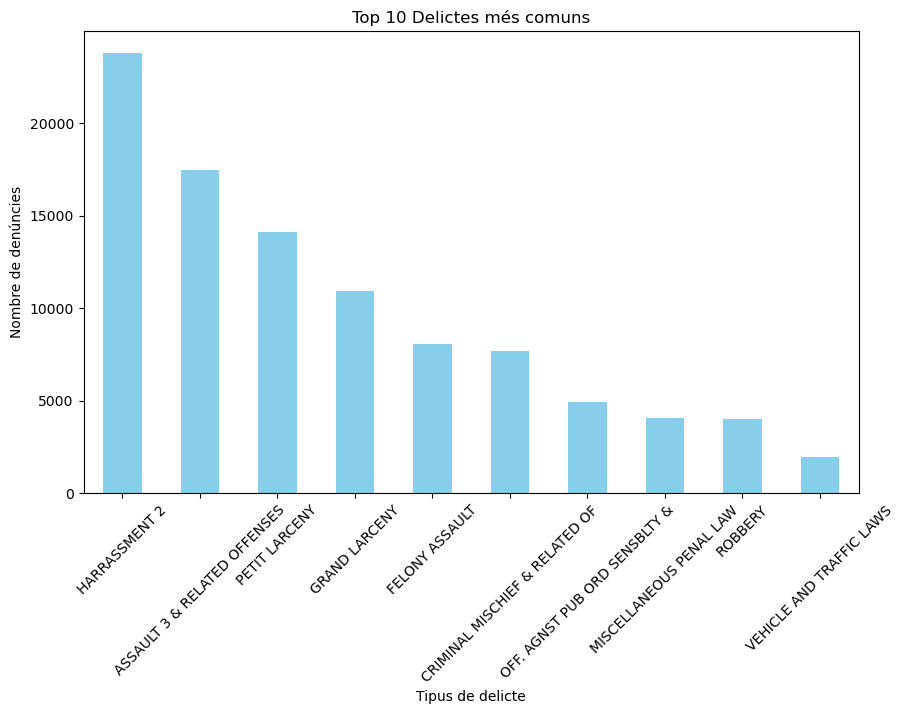

ADDR_PCT_CD
75     3123
44     2437
40     2430
43     2365
67     2287
47     2217
114    1991
103    1964
109    1938
52     1924
Name: count, dtype: int64


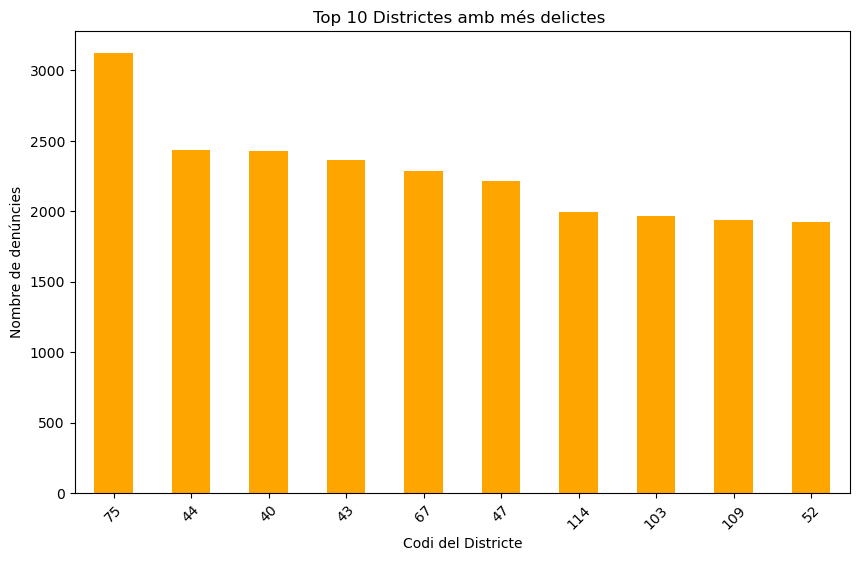

In [116]:
import matplotlib.pyplot as plt

# Comptem delictes per tipus utilitzant geo_df_top
delictes_per_tipus = geo_df_top['OFNS_DESC'].value_counts().head(10)
print(delictes_per_tipus)

#  Top 10 delictes més comuns
plt.figure(figsize=(10, 6))
delictes_per_tipus.plot(kind='bar', color='skyblue')
plt.title("Top 10 Delictes més comuns")
plt.xlabel("Tipus de delicte")
plt.ylabel("Nombre de denúncies")
plt.xticks(rotation=45)
plt.show()

# Comptem delictes per districte (ADDR_PCT_CD) utilitzant geo_df_top
delictes_per_districte = geo_df_top['ADDR_PCT_CD'].value_counts().head(10)
print(delictes_per_districte)

# Top 10 districtes amb més delictes
plt.figure(figsize=(10, 6))
delictes_per_districte.plot(kind='bar', color='orange')
plt.title("Top 10 Districtes amb més delictes ")
plt.xlabel("Codi del Districte")
plt.ylabel("Nombre de denúncies")
plt.xticks(rotation=45)
plt.show()


In [117]:

import seaborn as sns


# Seaborn trick estètic
sns.set(style="whitegrid")

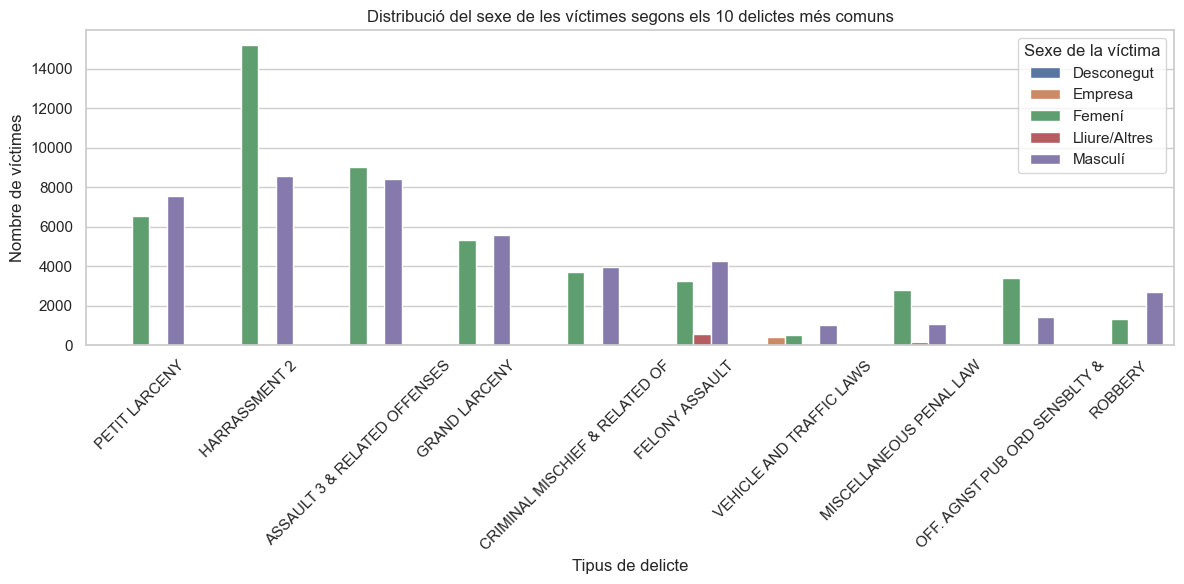

In [118]:
# Gràfic actualitzat
plt.figure(figsize=(12, 6))
sns.countplot(x='OFNS_DESC', hue='VIC_SEX', data=geo_df_top, order=top_10_delictes)
plt.xticks(rotation=45)
plt.title('Distribució del sexe de les víctimes segons els 10 delictes més comuns')
plt.xlabel('Tipus de delicte')
plt.ylabel('Nombre de víctimes')
plt.legend(title='Sexe de la víctima')
plt.tight_layout()
plt.show()


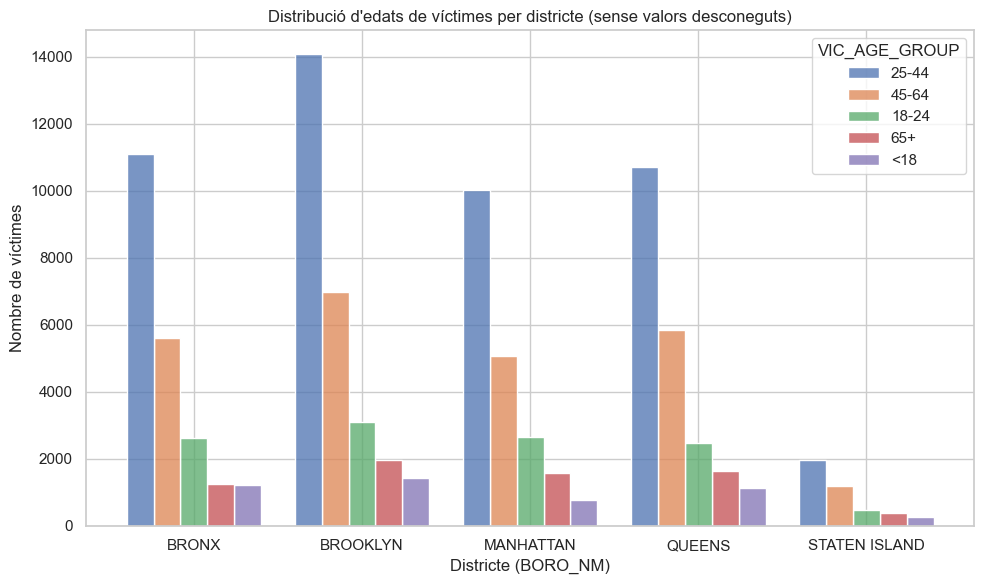

In [119]:
# Eliminem valors nulls o unknown
geo_df_top_filtered = geo_df_top[
    (geo_df_top['BORO_NM'].notnull()) &
    (geo_df_top['BORO_NM'] != '(null)') &
    (geo_df_top['VIC_AGE_GROUP'].notnull()) &
    (geo_df_top['VIC_AGE_GROUP'] != 'UNKNOWN')
]

# Gràfica actualitzada
plt.figure(figsize=(10, 6))
sns.histplot(x='BORO_NM', hue='VIC_AGE_GROUP', data=geo_df_top_filtered, multiple='dodge', shrink=0.8)
plt.title('Distribució d\'edats de víctimes per districte (sense valors desconeguts)')
plt.xlabel('Districte (BORO_NM)')
plt.ylabel('Nombre de víctimes')
plt.tight_layout()
plt.show()

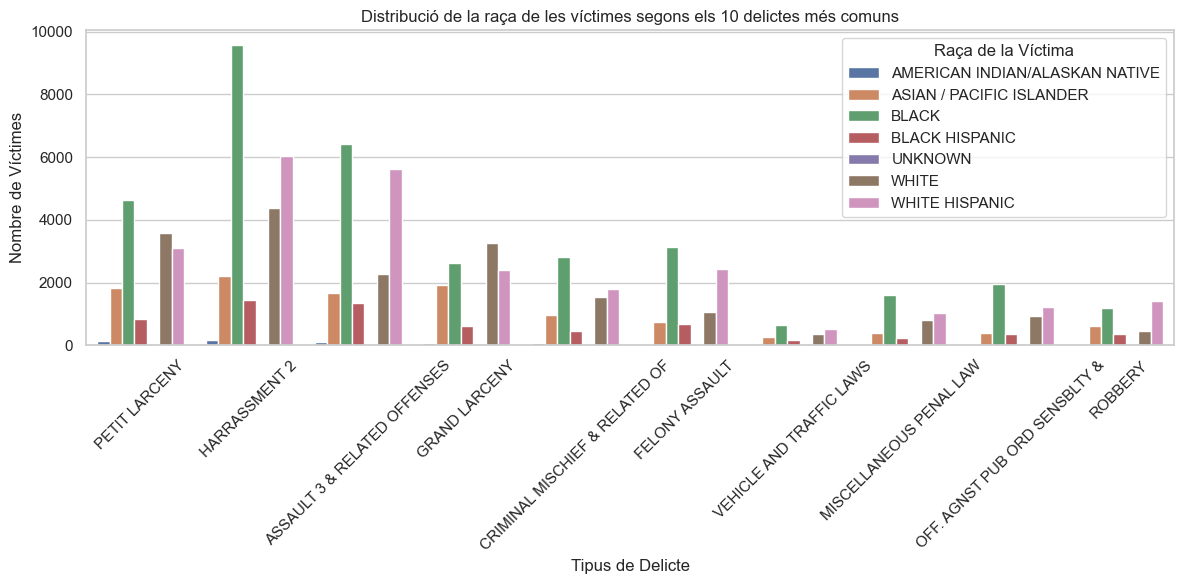

In [120]:


# Gràfic de distribució de raça de les víctimes per tipus de delicte
plt.figure(figsize=(12, 6))
sns.countplot(x='OFNS_DESC', hue='VIC_RACE', data=geo_df_top, order=top_10_delictes)
plt.xticks(rotation=45)
plt.title('Distribució de la raça de les víctimes segons els 10 delictes més comuns')
plt.xlabel('Tipus de Delicte')
plt.ylabel('Nombre de Víctimes')
plt.legend(title='Raça de la Víctima')
plt.tight_layout()
plt.show()

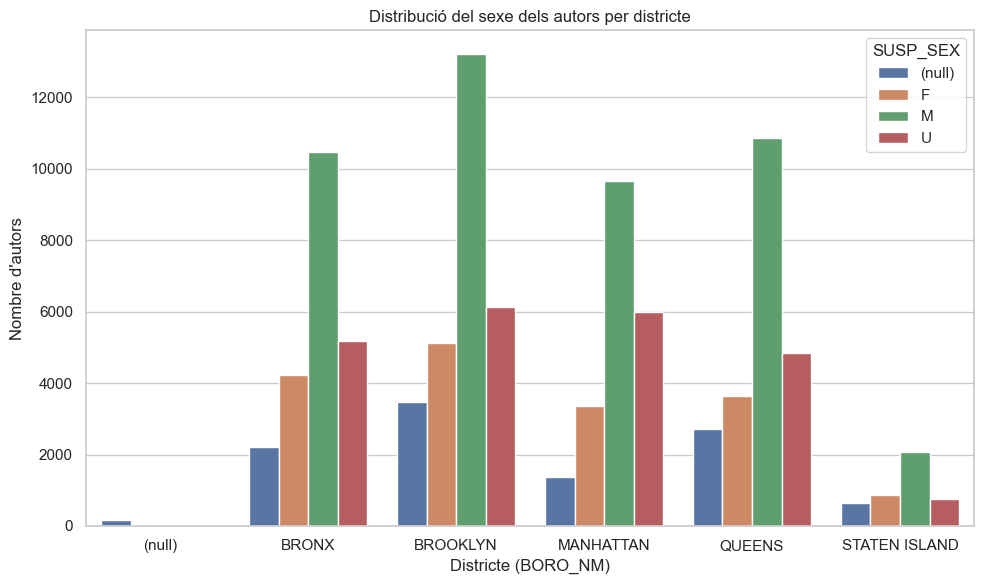

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BORO_NM', hue='SUSP_SEX', data=geo_df_top)
plt.title('Distribució del sexe dels autors per districte')
plt.xlabel('Districte (BORO_NM)')
plt.ylabel('Nombre d\'autors')
plt.tight_layout()
plt.show()

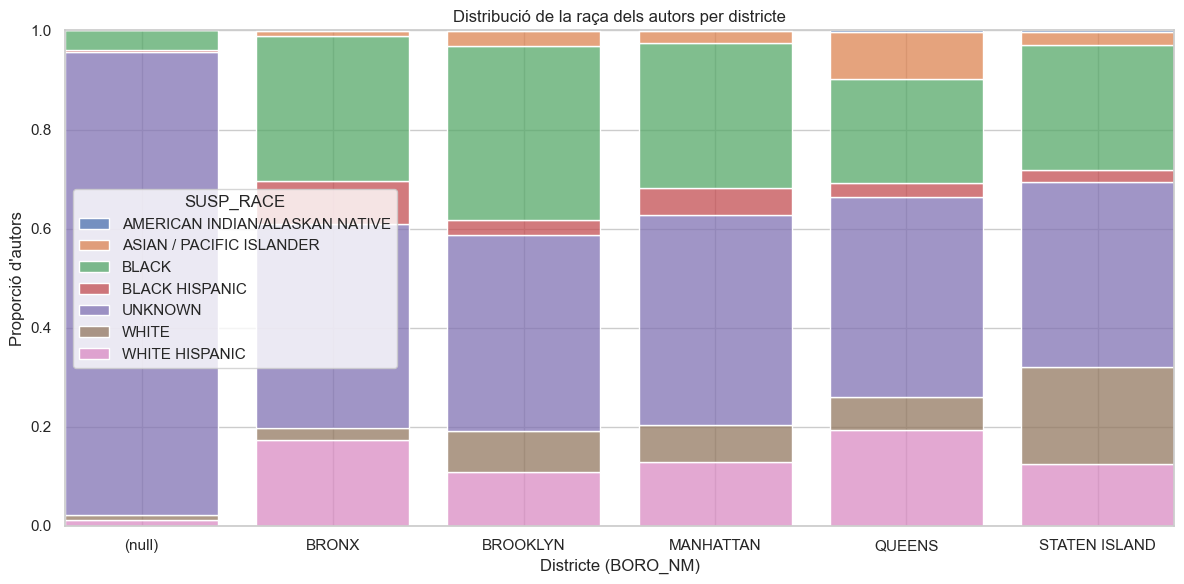

In [122]:
plt.figure(figsize=(12, 6))
sns.histplot(x='BORO_NM', hue='SUSP_RACE', data=geo_df_top, multiple='fill', shrink=0.8)
plt.title('Distribució de la raça dels autors per districte')
plt.xlabel('Districte (BORO_NM)')
plt.ylabel('Proporció d\'autors')
plt.tight_layout()
plt.show()


In [123]:
# Llistar delictes únics presents al dataframe filtrat
delictes_unics = geo_df_top_filtered['OFNS_DESC'].unique()

# Imprimir de manera ordenada
print("Llistat de delictes presents a la gràfica:")
for delicte in sorted(delictes_unics):
    print(delicte)

Llistat de delictes presents a la gràfica:
ASSAULT 3 & RELATED OFFENSES
CRIMINAL MISCHIEF & RELATED OF
FELONY ASSAULT
GRAND LARCENY
HARRASSMENT 2
MISCELLANEOUS PENAL LAW
OFF. AGNST PUB ORD SENSBLTY &
PETIT LARCENY
ROBBERY
VEHICLE AND TRAFFIC LAWS


In [124]:
# Comptar el nombre de casos per delicte
delictes_counts = geo_df_top_filtered['OFNS_DESC'].value_counts()

print("\nFrequència de cada delicte:")
print(delictes_counts)


Frequència de cada delicte:
OFNS_DESC
HARRASSMENT 2                       23527
ASSAULT 3 & RELATED OFFENSES        17355
PETIT LARCENY                       13882
GRAND LARCENY                       10893
FELONY ASSAULT                       7968
CRIMINAL MISCHIEF & RELATED OF       7581
OFF. AGNST PUB ORD SENSBLTY &        4793
ROBBERY                              4010
MISCELLANEOUS PENAL LAW              3934
VEHICLE AND TRAFFIC LAWS             1547
PROSTITUTION & RELATED OFFENSES         0
POSSESSION OF STOLEN PROPERTY           0
MURDER & NON-NEGL. MANSLAUGHTER         0
NEW YORK CITY HEALTH CODE               0
UNLAWFUL POSS. WEAP. ON SCHOOL          0
OFFENSES AGAINST PUBLIC ADMINI          0
UNAUTHORIZED USE OF A VEHICLE           0
OFFENSES AGAINST PUBLIC SAFETY          0
THEFT-FRAUD                             0
OFFENSES AGAINST THE PERSON             0
OFFENSES INVOLVING FRAUD                0
OFFENSES RELATED TO CHILDREN            0
OTHER OFFENSES RELATED TO THEFT      

In [125]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carreguem un shape de NYC
districts = gpd.read_file('/content/drive/MyDrive/NYPD_Project/20221006-Final-Plan-Districts/Districts 2022-10-06.shp')

#Comprovem
#print(districts.head())
#print(districts.crs)  # Projecció del fitxer SHP

# ens assegurem que les projeccions coincideixen amb EPSG:4326 per lat/long
if districts.crs != geo_df_2024.crs:
    districts = districts.to_crs(geo_df_2024.crs)

# Mapa
fig, ax = plt.subplots(figsize=(12, 10))
districts.plot(ax=ax, color='lightgrey', edgecolor='black')

# + punts de delictes
geo_df_2024.plot(ax=ax, markersize=10, color='red', alpha=0.5)

plt.title("Mapa de delictes sobre districtes de NYC")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Etiquetes amb el núm dels districtes
for x, y, label in zip(districts.geometry.centroid.x, districts.geometry.centroid.y, districts['DISTRICT']):
    plt.text(x, y, label, fontsize=8, ha='center')

plt.show()


DriverError: '/content/drive/MyDrive/NYPD_Project/20221006-Final-Plan-Districts/Districts 2022-10-06.shp' does not exist in the file system, and is not recognized as a supported dataset name.

In [126]:
# Comptem quants delictes són per districte
crimes_by_district = gpd.sjoin(geo_df_2024, districts, how='inner', predicate='intersects')
crime_counts = crimes_by_district.groupby('DISTRICT').size().reset_index(name='counts')
print(crime_counts)


districts = districts.merge(crime_counts, on='DISTRICT', how='left')
districts['counts'] = districts['counts'].fillna(0)

fig, ax = plt.subplots(figsize=(12, 10))
districts.plot(column='counts', ax=ax, cmap='OrRd', legend=True)
plt.title("Densitat de delictes per districte")
plt.show()


NameError: name 'districts' is not defined